# MATH 525 - Statistics I, Fall 2021
## Assignment 2 - Konstantinos Georgiou
Due: Monday, October 10, by 8:00PM

## Initializations

In [3]:
# (For Google Collab) Mount Google Drive and set working directory
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
# Set working directory
project_path = '/content/drive/MyDrive/Documents/Work Documents/UTK/Courses/MATH525/Assignments/Assignment 2'
os.chdir(project_path)
print(os.listdir(project_path))

Mounted at /content/drive
['assignment_2.pdf', 'data', 'p1t3.png', 'p2t3.png', 'KonstantinosGeorgiou_Assignment2_MATH525.ipynb']


In [4]:
# Imports
import numpy as np
from scipy.io import loadmat
from scipy.stats import beta as beta_dist, norm
from scipy.optimize import fminbound, fmin
from scipy.special import erfc, beta as beta_func
import matplotlib as mpl
from matplotlib import pyplot as plt
from typing import *

## Load Data & Exploration

In [5]:
# Load datasets
print(os.listdir('/content/drive/MyDrive/Documents/Work Documents/UTK/Courses/MATH525/Assignments/Assignment 2/data'))
geo_beta = loadmat('data/geo_beta.mat')
normal_normal = loadmat('data/normal_normal.mat')

['geo_beta.mat', 'normal_normal.mat']


In [8]:
# Data exploration
# Geo Beta
print("--------\nComponents of Geo Beta: ", geo_beta.keys())
geo_beta_w = np.fix(geo_beta['w']).astype("int64").astype("float64")
print(f"Geo Beta_w W:\n\tType: {geo_beta_w.dtype}, Shape: {geo_beta_w.shape}")
print(f"\tContents: {geo_beta_w[:, :].T}")
# Normal Normal
print("--------\nComponents of normal_normal: ", normal_normal.keys())
normal_normal_w = normal_normal['w']
print(f"Normal Normal w:\n\tType: {normal_normal_w.dtype}, Shape: {normal_normal_w.shape}")
print(f"\tContents: {normal_normal_w[:, :].T}")

--------
Components of Geo Beta:  dict_keys(['__header__', '__version__', '__globals__', 'w'])
Geo Beta_w W:
	Type: float64, Shape: (14, 1)
	Contents: [[ 6.  2. 67.  8. 14. 17. 12.  7.  6.  4.  6.  2. 11.  0.]]
--------
Components of normal_normal:  dict_keys(['__header__', '__version__', '__globals__', 'w'])
Normal Normal w:
	Type: float64, Shape: (25, 1)
	Contents: [[ 0.85098623  2.68116604  0.7415467   0.39038696  0.65444876  0.92733513
   0.94131924  1.67838023  1.30313855  2.08644262  0.64811303  2.30032071
  -0.00940472  2.37587415  1.25721046  1.66681344 -0.46541871  0.22992861
   2.67517127  3.52916018  1.22484276  2.10365845  3.28125189  3.27365833
  -0.36512257]]


## Problem 1(iii) - compare graphically the prior and posterior of µ.

In [151]:
# from scipy.interpolate import make_interp_spline, BSpline
# def interpolate(x, y, k=3):
#   x, y = x[:,0], y[:,0]
#   xnew = np.linspace(x.min(), x.max(), 300)
#   spl = make_interp_spline(x, y, k=k)  # type: BSpline
#   ynew = spl(xnew)
#   return xnew, ynew

In [209]:
def get_normal_pdf(x: np.ndarray, mean: float, variance: float) -> np.ndarray:
  pdf = 1/np.sqrt(2*np.pi*variance)*np.exp(-(x-mean)**2/(2*variance))
  return pdf

def get_posterior_mean_and_var(data: np.ndarray, 
                               mean_prior: float, variance_prior: float,
                               variance_likelihood: float) -> Tuple[np.ndarray, np.ndarray]:
  data_sum = np.sum(data)
  N = data.shape[0] 
  mean_post = (variance_likelihood*mean_prior+variance_prior*data_sum)/(variance_likelihood+N*variance_prior)
  variance_post = (variance_likelihood*variance_likelihood)/(variance_likelihood+N*variance_prior)
  return mean_post, variance_post

# Set the values we know
mean_prior = 0
variance_prior = 10
variance_likelihood = 1
print(f"mean_prior={mean_prior}, variance_prior={variance_prior}")
print(f"variance_likelihood={variance_likelihood}")
# Generate x values
x = np.linspace(-100, 100, 1000000)
# Calculate prior pdf
prior_pdf = get_normal_pdf(x=x, 
                           mean=mean_prior, variance=variance_prior)
# Calculate posterior mean and variance
mean_post, variance_post = get_posterior_mean_and_var(data=normal_normal_w, 
                                                      mean_prior=mean_prior,
                                                      variance_prior=variance_prior,
                                                      variance_likelihood=variance_likelihood)
print(f"mean_post={mean_post}, variance_post={variance_post}")
# Calculate posterior pdf
post_pdf = get_normal_pdf(x=x, 
                          mean=mean_post, variance=variance_post)

mean_prior=0, variance_prior=10
variance_likelihood=1
mean_post=1.433514252429064, variance_post=0.00398406374501992


Plot


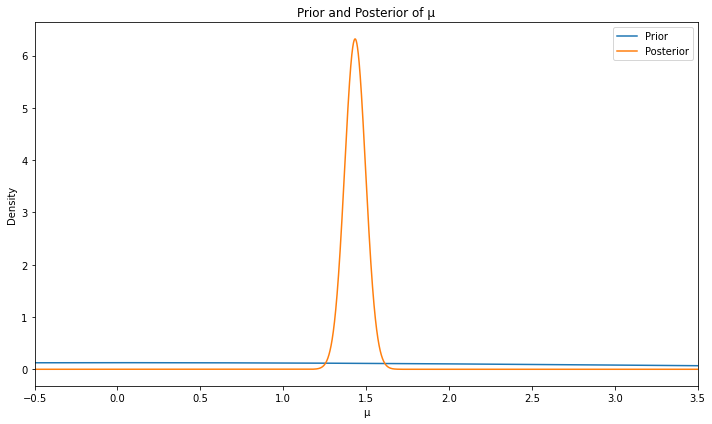

In [210]:
print("Plot")
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# Plots
ax.plot(x, prior_pdf, label='Prior')
# ax.plot(*interpolate(data_sorted, prior_sorted), label='Prior Interpolated')
ax.plot(x, post_pdf, label='Posterior')
# ax.plot(*interpolate(data_sorted, post_sorted, k=2), label='Posterior Interpolated')
# Ranges
ax.set_xlim(-0.5, 3.5)
# Labels
ax.legend()
ax.set_title("Prior and Posterior of μ")
ax.set_xlabel('μ')
ax.set_ylabel('Density')
fig.tight_layout()

## Problem 1(iv) -  compute the prior and posterior probability that µ takes a negative value.

In [183]:
from scipy.integrate import quad
print(f"mean_post={mean_post}, variance_post={variance_post}")
# Set the values we know
mean_prior = 0
variance_prior = 10
variance_likelihood = 1

# Calculate prior probability using integral
prior_I = quad(get_normal_pdf, -np.inf, 0, args=(mean_prior, variance_prior))
print("Integral for prior: ", prior_I[0])

# Calculate posterior probability using integral
post_I = quad(get_normal_pdf, -np.inf, 0, args=(mean_post, variance_post))
print("Integral for posterio: ", post_I[0])

mean_post=1.433514252429064, variance_post=0.00398406374501992
0.5
1.766059954858669e-114


## Problem 2(iii) - compare graphically the prior and posterior of µ.

In [212]:
def get_beta_pdf(x: np.ndarray, alpha: float, beta: float, show: bool=False) -> np.ndarray:
  beta_func_out = beta_func(alpha, beta)
  left = x**(alpha-1)
  right = ((1-x)**(beta-1))/beta_func_out
  pdf = left * right
  if show:
    print(f"alpha={alpha}, beta={beta}")
    print("beta_func: ", beta_func_out)
    print("x:\n", x.T)
    print("left:\n", left.T)
    print("right:\n", right.T)
    print("pdf:\n", pdf.T)
  return pdf

def get_posterior_alpha_and_beta(data: np.ndarray, 
                                 alpha_prior: float,
                                 beta_prior: float) -> Tuple[np.ndarray, np.ndarray]:
  data_sum = np.sum(data)
  N = data.shape[0] 
  alpha_post = N+alpha_prior
  beta_post = data_sum+beta_prior
  return alpha_post, beta_post

# Set the values we know
alpha_prior = 1
beta_prior = 1
# Generate x values
x = np.linspace(0, 1, 100000)
print(f"alpha_prior={alpha_prior}, beta_prior={beta_prior}")
# Calculate prior pdf
prior_pdf = get_beta_pdf(x=x, 
                         alpha=alpha_prior, beta=beta_prior)
# Calculate posterior alpha and beta
alpha_post, beta_post = get_posterior_alpha_and_beta(data=geo_beta_w, 
                                                     alpha_prior=alpha_prior,
                                                     beta_prior=beta_prior)
print(f"alpha_post={alpha_post}, beta_post={beta_post}")
# Calculate posterior pdf
post_pdf = get_beta_pdf(x=x, 
                        alpha=alpha_post, beta=beta_post, show=0)

alpha_prior=1, beta_prior=1
alpha_post=15, beta_post=163.0


Plot
[inf]


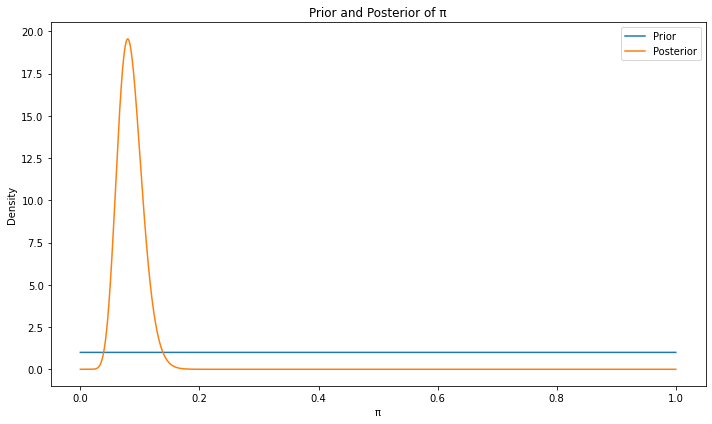

In [213]:
print("Plot")
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# Plots
ax.plot(x, prior_pdf, label='Prior')
ax.plot(x, post_pdf, label='Posterior')
# Labels
ax.legend()
ax.set_title("Prior and Posterior of π")
ax.set_xlabel('π')
ax.set_ylabel('Density')
fig.tight_layout()
print(np.sum(post_sorted, axis=0))

## Problem 2(iv) -  compute the prior and posterior probability that $\pi$ takes a value above 0.15.

In [207]:
# Find value for Beta(1, 1)
print("Beta(1, 1)=", beta_func(1, 1))
# Values of a1 and b1
print(f"alpha_prior={alpha_prior}, beta_prior={beta_prior}")
print(f"alpha_post={alpha_post}, beta_post={beta_post}")

# Calculate prior probability using integral
prior_I = quad(get_beta_pdf, 0.15, 1, args=(alpha_prior, beta_prior))
print("Integral for prior: ", prior_I[0])
# Calculate posterior probability using integral
post_I = quad(get_beta_pdf,  0.15, 1, args=(alpha_post, beta_post))
print("Integral for posterior: ", post_I[0])

Beta(1, 1)= 1.0
alpha_prior=1, beta_prior=1
alpha_post=15, beta_post=163.0
Integral for prior:  0.85
Integral for posterior:  0.0033625668021733273


In [214]:
beta_func(15, 163)

3.0604098911703136e-23